In [3]:
import sys
import os
from dotenv import load_dotenv
import pandas as pd

# プロジェクトルートのパスを追加（quantechiaがあるディレクトリ）
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
load_dotenv()

True

In [4]:
import pandas as pd
import numpy as np
from quantechia.strategy import basestrategy, trend 
from quantechia import analysis
from quantechia.data.data_fetcher import FinancialDataFetcher

from quantechia import utils
import importlib
importlib.reload(utils)
importlib.reload(basestrategy)
importlib.reload(analysis)

<module 'quantechia.analysis' from '/app/quantechia/analysis.py'>

In [5]:
# 株価データを取得
fetcher = FinancialDataFetcher()
tickers = ['AAPL', 'MSFT', 'GOOG']
start_date = '2023-01-01'
end_date = '2023-03-31'
historical_data = fetcher.get_historical_data("data_reader", name=tickers, data_source='stooq')
price_data = historical_data['Close']



In [6]:
equal_weight_strategy = basestrategy.EqualWeightStrategy(price_data, strategy_name="Equal Weight")
trend_following_strategy = trend.TrendFollowingStrategy(price_data, window=20, strategy_name="Trend Following")

In [7]:
equal_weight_strategy.calculate_weight()

Symbols,AAPL,MSFT,GOOG
Date,,,
2020-05-20,0.333333,0.333333,0.333333
2020-05-21,0.333333,0.333333,0.333333
2020-05-22,0.333333,0.333333,0.333333
2020-05-26,0.333333,0.333333,0.333333
2020-05-27,0.333333,0.333333,0.333333
...,...,...,...
2025-05-12,0.333333,0.333333,0.333333
2025-05-13,0.333333,0.333333,0.333333
2025-05-14,0.333333,0.333333,0.333333


In [ ]:
equal_weight_strategy.calculate_returns()

,0
Date,
2020-05-21,-0.007430
2020-05-22,0.004109
2020-05-26,-0.004244
2020-05-27,0.002097
2020-05-28,-0.000834
...,...
2025-05-12,0.039813
2025-05-13,0.006031
2025-05-14,0.014146


In [ ]:
equal_weight_strategy.evaluate(report_path="equal_weight_strategy_report.html")

{'sharpe_ratio': np.float64(0.9127510516867792),
 'max_drawdown': np.float64(-0.3498269274993354),
 'winning_rate': 0.547410358565737,
 'turnover': np.float64(0.0)}

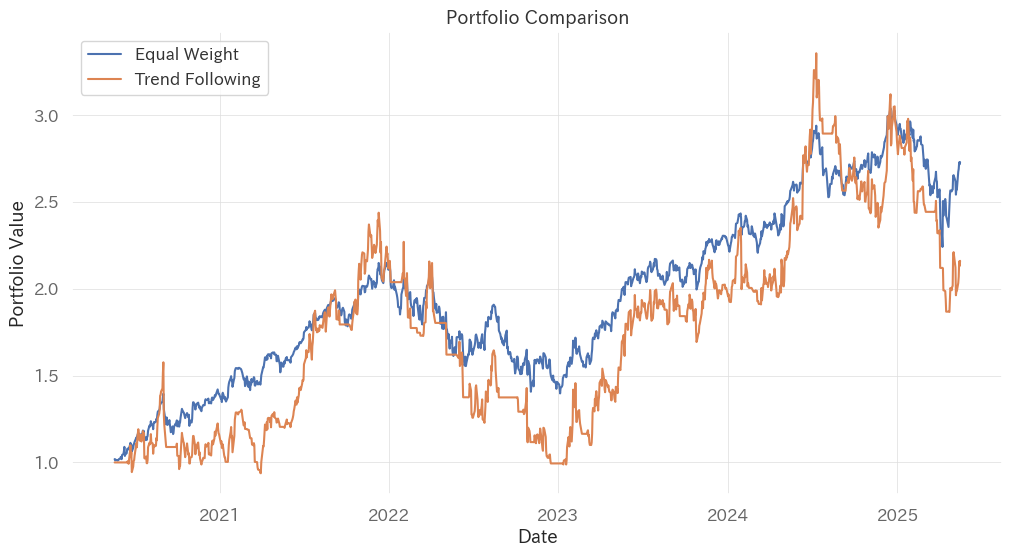

(                 sharpe_ratio  max_drawdown  winning_rate  turnover
 Equal Weight         0.912751     -0.349827      0.547410  0.000000
 Trend Following      0.565073     -0.594618      0.508806  7.098361,
             Equal Weight  Trend Following
 Date                                     
 2020-05-20      0.019188         0.000000
 2020-05-21     -0.007430         0.000000
 2020-05-22      0.004109         0.000000
 2020-05-26     -0.004244         0.000000
 2020-05-27      0.002097         0.000000
 ...                  ...              ...
 2025-05-12      0.039813         0.023001
 2025-05-13      0.006031         0.018094
 2025-05-14      0.014146         0.042438
 2025-05-15     -0.004059        -0.012178
 2025-05-16      0.004630         0.013891
 
 [1255 rows x 2 columns],
             Equal Weight  Trend Following
 Date                                     
 2020-05-20      1.019188         1.000000
 2020-05-21      1.011616         1.000000
 2020-05-22      1.015773        

In [ ]:
analysis.compare_strategies([equal_weight_strategy, trend_following_strategy])

In [ ]:
qs.stats.sharpe((equal_weight_strategy.weight.shift() * equal_weight_strategy.rtn_data).sum(axis=1).iloc[1:])

np.float64(0.9127510516867792)

In [ ]:
import quantstats as qs
qs.stats.sharpe(equal_weight_strategy.rtn)

np.float64(0.9127510516867792)